# Loading Data 

In [1]:
!unzip lfw_funneled.zip

Archive:  lfw_funneled.zip
   creating: lfw_funneled/
   creating: lfw_funneled/George_HW_Bush/
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0001.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0002.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0003.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0004.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0005.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0006.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0007.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0008.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0009.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0010.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0011.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0012.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0013.jpg  
   creating: lfw_funneled/Curtis_

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as ks
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import random as rand
import seaborn as sns
import scipy as sci
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import os
import cv2
from math import log10, sqrt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.utils import to_categorical
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [20]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [15]:
Training = []
Result_Training = []
for dirname, _, filenames in os.walk('./lfw_funneled/'):
    for filename in filenames:
        img = cv2.imread(os.path.join(dirname, filename))
        Result_Training.append(filename.split("_")[0])
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        Training.append(img)
np.array(Training).shape, np.array(Result_Training).shape

((621, 32, 32, 3), (621,))

# Loading LapSRN model

In [17]:
super_res = cv2.dnn_superres.DnnSuperResImpl_create()
super_res.readModel('./LapSRN_x4.pb')
super_res.setModel('lapsrn',4)

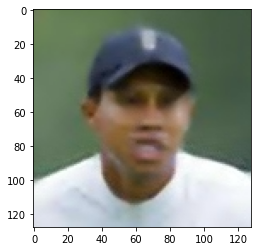

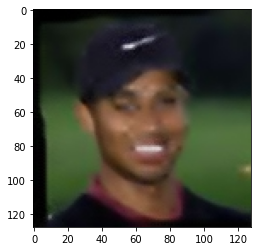

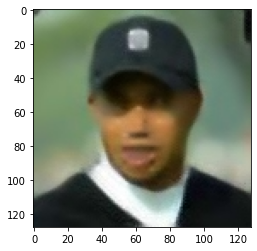

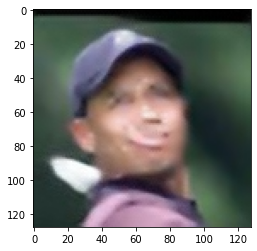

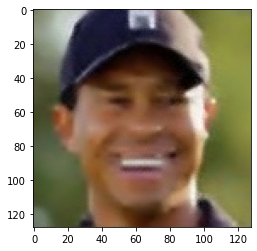

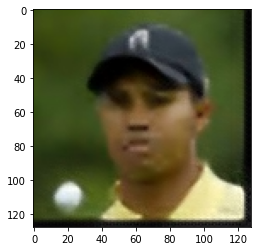

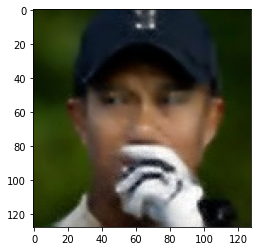

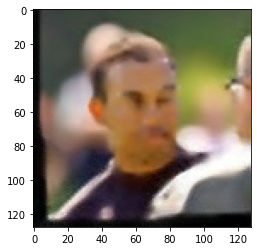

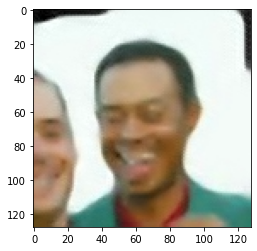

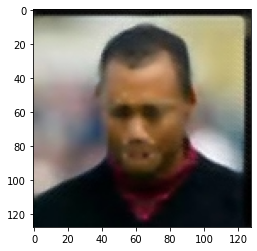

In [18]:
for i in range(10):
  plt.imshow(super_res.upsample(Training[i]))
  plt.show()

**Upsampling Images**

In [19]:
Temp_Train = []
for i in Training:
  img = super_res.upsample(i)
  print(".", end="")
  Temp_Train.append(img)

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

**Changing Dimentions normaly**

In [21]:
test = []
for i in Training:
  img = cv2.resize(i, (32*4, 32*4))
  test.append(img)
np.array(test).shape

(621, 128, 128, 3)

# Calculating PSNR of LapSRN on LFW Dataset

In [22]:
PSNR(np.array(test), np.array(Temp_Train))

34.139820788479305

# Calculating SSIM of LapSRN on LFW Dataset

In [23]:
ssim(np.array(Temp_Train), np.array(test), multichannel=True)

0.9867035720687722

# Loading EDSR model

In [24]:
super_res = cv2.dnn_superres.DnnSuperResImpl_create()
super_res.readModel('./EDSR_x3.pb')
super_res.setModel('edsr',3)

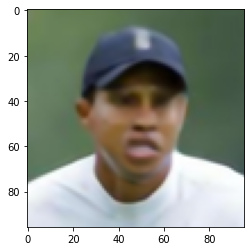

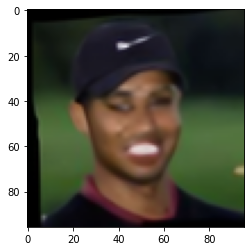

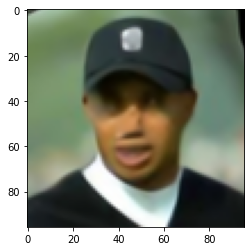

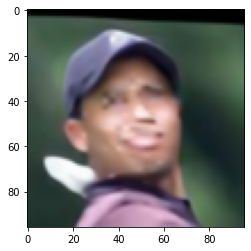

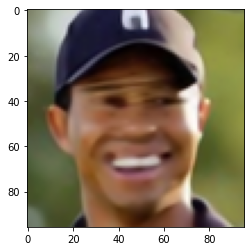

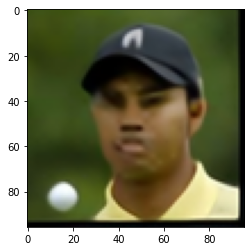

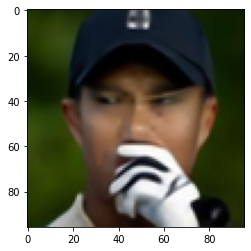

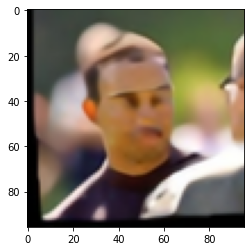

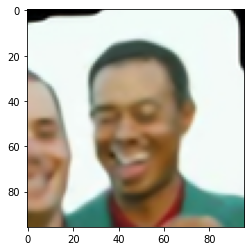

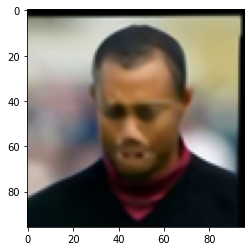

In [25]:
for i in range(10):
  plt.imshow(super_res.upsample(Training[i]))
  plt.show()

Upsampling by Model and normal way

In [26]:
Temp_Train = []
for i in Training:
  img = super_res.upsample(i)
  print(".", end="")
  Temp_Train.append(img)

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [27]:
test = []
for i in Training:
  img = cv2.resize(i, (32*3, 32*3))
  test.append(img)
np.array(test).shape

(621, 96, 96, 3)

## Calculating PSNR of EDSR on LFW Dataset

In [28]:
PSNR(np.array(test), np.array(Temp_Train))

34.038665790791775

## Calculating SSIM of EDSR on LFW Dataset

In [29]:
ssim(np.array(Temp_Train), np.array(test), multichannel=True)

0.9787746485679434

In [30]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: tinyface/Training_Set/2898/2898_1.jpg  
  inflating: tinyface/Training_Set/2898/2898_2.jpg  
  inflating: tinyface/Training_Set/2899/2899_1.jpg  
  inflating: tinyface/Training_Set/2899/2899_2.jpg  
  inflating: tinyface/Training_Set/2900/2900_1.jpg  
  inflating: tinyface/Training_Set/2900/2900_2.jpg  
  inflating: tinyface/Training_Set/2900/2900_3.jpg  
  inflating: tinyface/Training_Set/2902/2902_1.jpg  
  inflating: tinyface/Training_Set/2902/2902_2.jpg  
  inflating: tinyface/Training_Set/2903/2903_1.jpg  
  inflating: tinyface/Training_Set/2903/2903_2.jpg  
  inflating: tinyface/Training_Set/2904/2904_1.jpg  
  inflating: tinyface/Training_Set/2904/2904_2.jpg  
  inflating: tinyface/Training_Set/2904/2904_3.jpg  
  inflating: tinyface/Training_Set/2905/2905_1.jpg  
  inflating: tinyface/Training_Set/2905/2905_2.jpg  
  inflating: tinyface/Training_Set/2905/2905_3.jpg  
  inflating: tinyface/Training_Set/2905/2905_4.j

In [31]:
Training = []
for dirname, _, filenames in os.walk('/content/tinyface/Training_Set/'):
    for filename in filenames:
        img = cv2.imread(os.path.join(dirname, filename))
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        Training.append(img)
np.array(Training).shape

(7804, 32, 32, 3)

In [32]:
super_res = cv2.dnn_superres.DnnSuperResImpl_create()
super_res.readModel('/content/LapSRN_x4.pb')
super_res.setModel('lapsrn',4)

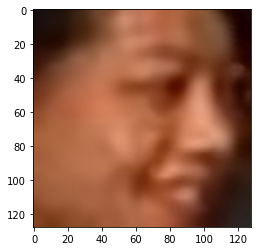

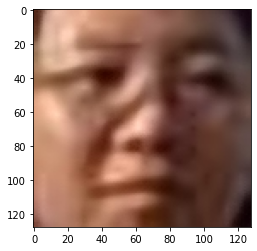

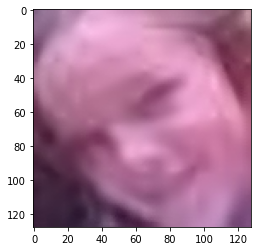

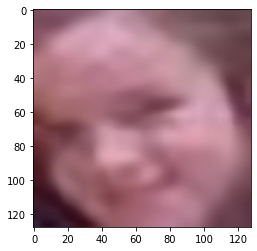

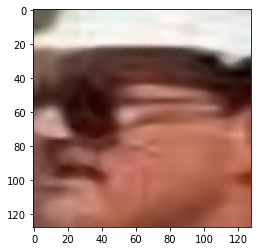

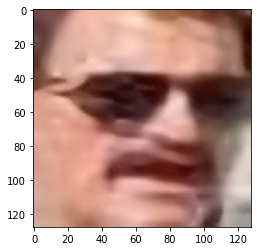

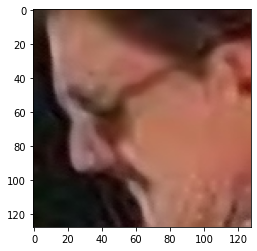

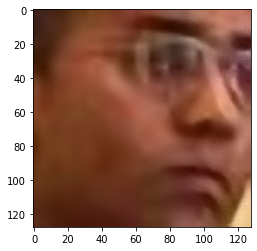

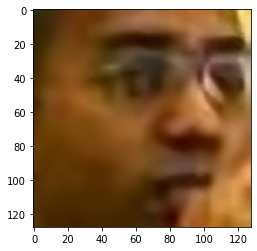

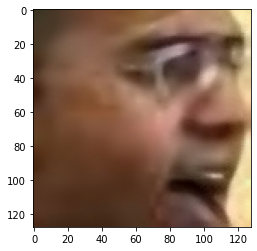

In [33]:
for i in range(10):
  plt.imshow(super_res.upsample(Training[i]))
  plt.show()

In [34]:
Temp_Train = []
for i in Training[:600]:
  img = super_res.upsample(i)
  print(".", end="")
  Temp_Train.append(img)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [35]:
test = []
for i in Training[:600]:
  img = cv2.resize(i, (32*4, 32*4))
  test.append(img)
np.array(test).shape

(600, 128, 128, 3)

# Calculating PSNR of LapSRN on TinyFace Dataset

In [36]:
PSNR(np.array(test), np.array(Temp_Train))

39.65619068549153

# Calculating SSIM of LapSRN on TinyFace Dataset

In [37]:
ssim(np.array(Temp_Train), np.array(test), multichannel=True)

0.9971789747949301

In [38]:
super_res = cv2.dnn_superres.DnnSuperResImpl_create()
super_res.readModel('./EDSR_x3.pb')
super_res.setModel('edsr',3)

In [39]:
test = []
for i in Training[:600]:
  img = cv2.resize(i, (32*3, 32*3))
  test.append(img)
np.array(test).shape

(600, 96, 96, 3)

In [40]:
Temp_Train = []
for i in Training[:600]:
  img = super_res.upsample(i)
  print(".", end="")
  Temp_Train.append(img)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# Calculating PSNR of EDSR on TinyFace Dataset

In [41]:
PSNR(np.array(test), np.array(Temp_Train))

40.036918361652035

# Calculating SSIM of EDSR on TinyFace Dataset

In [42]:
ssim(np.array(Temp_Train), np.array(test), multichannel=True)

0.9974513943242105